In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'text.usetex':True})

In [3]:
data16 = pd.read_excel('cola_learning_curves.xlsx', sheet_name='cola_16', index_col='Epoch')
data2 = pd.read_excel('cola_learning_curves.xlsx', sheet_name='cola_2', index_col='Epoch')
data256 = pd.read_excel('cola_learning_curves.xlsx', sheet_name='cola_256', index_col='Epoch')

In [4]:
data16.head()

,Training Loss,Validation Loss,Matthews Correlation
Epoch,,,
1,0.5574,0.490924,0.477905
2,0.4403,0.594486,0.418455
3,0.3992,0.544883,0.515291
4,0.3619,0.413942,0.575641
5,0.3356,0.478634,0.542309


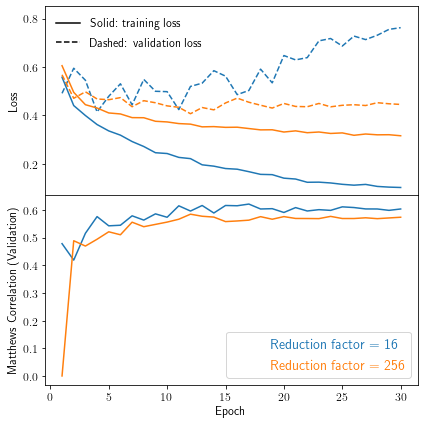

In [11]:
fig,ax = plt.subplots(2,1, figsize=(6,6), sharex=True)

#data16.drop('Matthews Correlation', axis=1).plot(ax=ax[0])
for i,D in enumerate([data16, data256]):
    c = 'C{}'.format(i)
    D['Training Loss'].plot(ax=ax[0], ls='-', c=c)
    D['Validation Loss'].plot(ax=ax[0], ls='--', c=c)
    D['Matthews Correlation'].plot(ax=ax[1], ls='-', c=c)

#data256.drop('Matthews Correlation', axis=1).plot(ax=ax[0])
# data256['Training Loss'].plot(ax=ax[0], ls='-', c='C1')
# data256['Validation Loss'].plot(ax=ax[0], ls='--', c='C1')
# data256['Matthews Correlation'].plot(ax=ax[1], ls='-',  c='C1')

ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Matthews Correlation (Validation)')

lss = ['','','-','--']
cs = ['C0', 'C1','k', 'k']

lines = [plt.Line2D((0,1),(0,0), ls=ls, c=c) for c,ls in zip(cs,lss)]
labels = ['Reduction factor = 16', 'Reduction factor = 256','Solid: training loss', 'Dashed: validation loss', ]

ax[0].legend(lines[2:],labels[2:], labelcolor='linecolor', loc=2, frameon=False)
ax[1].legend(lines[:2],labels[:2], labelcolor='linecolor', loc=4, frameon=True, fontsize=14)

ax[0].set_ylim(ymax=0.85)

#ax[0].legend()

fig.tight_layout()
fig.subplots_adjust(hspace=0)

fig.savefig('adapterloss_rf.pdf', bbox_inches='tight')